# 6. Sequential

In [46]:
import joblib
import os

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from scikeras.wrappers import KerasRegressor

import matplotlib.pyplot as plt

import seaborn as sns

In [69]:
%run ./scripts/store_model_performance.py
%run ./scripts/atomic_benchmark_estimator.py

In [3]:
df = pd.read_pickle("./pickles/003.dataframe.data-preprocessing.pkl")

In [4]:
df

,price,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,review_scores_rating,...,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,Entire place,Hotel room,Private room,Shared room
0,53,0,0.000138,1,0,0.543185,0.012963,0.066667,0.0,1.0,...,0,0,0,0,1,1,1.0,0.0,0.0,0.0
1,120,0,0.000138,1,1,0.543180,0.013029,0.066667,0.0,1.0,...,1,0,0,0,1,1,1.0,0.0,0.0,0.0
2,89,0,0.000138,1,0,0.543124,0.012873,0.066667,0.0,1.0,...,0,0,0,1,1,1,1.0,0.0,0.0,0.0
3,58,0,0.000138,1,1,0.542730,0.012810,0.066667,0.0,1.0,...,0,0,0,1,0,1,1.0,0.0,0.0,0.0
4,60,0,0.000138,1,0,0.542833,0.012610,0.066667,0.0,1.0,...,0,0,0,1,1,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,120,0,0.000138,1,1,0.542522,0.012857,0.066667,0.0,1.0,...,0,1,0,1,1,1,1.0,0.0,0.0,0.0
279708,60,0,0.000138,1,1,0.543257,0.012956,0.066667,0.0,1.0,...,1,0,0,1,1,1,1.0,0.0,0.0,0.0
279709,50,0,0.000138,1,1,0.543189,0.013051,0.066667,0.0,1.0,...,1,0,0,0,1,1,1.0,0.0,0.0,0.0
279710,105,0,0.000138,1,1,0.542965,0.013229,0.066667,0.0,1.0,...,1,1,0,1,1,1,1.0,0.0,0.0,0.0


## 6.1. Split train test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], random_state=42, train_size=.75)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209699, 63), (69900, 63), (209699,), (69900,))

In [7]:
X_train

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,review_scores_rating,review_scores_accuracy,...,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,Entire place,Hotel room,Private room,Shared room
160755,0,0.000968,1,1,0.465485,0.069388,0.000000,0.000000,0.98,1.0,...,1,0,1,1,0,1,0.0,0.0,1.0,0.0
220908,0,0.000000,1,1,0.543280,0.013114,0.066667,0.010521,0.93,0.9,...,1,1,0,0,1,1,1.0,0.0,0.0,0.0
24800,0,0.000138,1,1,0.453291,-0.410921,0.200000,0.000000,1.00,1.0,...,0,1,1,1,1,1,1.0,0.0,0.0,0.0
157756,1,0.001106,1,0,0.453011,-0.410409,0.133333,0.000000,0.95,0.9,...,1,1,1,0,0,1,0.0,0.0,1.0,0.0
76686,0,0.000276,1,1,-0.375519,0.840476,0.133333,0.010521,0.98,1.0,...,1,1,1,1,1,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,0,0.000276,1,0,0.453488,-0.410847,0.000000,0.000000,0.93,0.9,...,1,1,0,0,0,1,0.0,0.0,1.0,0.0
259291,0,0.000138,1,1,0.543058,0.013010,0.333333,0.020408,0.92,0.9,...,1,1,1,1,1,1,1.0,0.0,0.0,0.0
131933,0,0.000415,1,1,-0.376483,0.840064,0.066667,0.000000,0.96,1.0,...,1,1,1,1,1,1,0.0,0.0,1.0,0.0
146868,0,0.000276,1,1,0.463658,0.068278,0.066667,0.000000,1.00,1.0,...,1,0,0,1,0,1,0.0,0.0,1.0,0.0


In [8]:
y_train

160755     65
220908     30
24800     148
157756     47
76686     175
         ... 
119880     80
259291    193
131933     69
146868     51
121959    950
Name: price, Length: 209699, dtype: Int64

## 6.2. Model

In [9]:
model_path = "./pickles/sequential.h5"

In [10]:
exists = os.path.exists(model_path)
exists

False

In [11]:
if exists:
    model = keras.models.load_model(model_path)
else:
    model = keras.Sequential([
        layers.Dense(64, input_shape=(X_train.shape[1], ), activation="tanh"),
        layers.Dense(64, activation="tanh"),
        layers.Dense(32, activation="tanh"),
        layers.Dense(32, activation="sigmoid"),
        layers.Dense(1, activation="linear"),
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4096      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,425
Trainable params: 11,425
Non-trainable params: 0
_________________________________________________________________


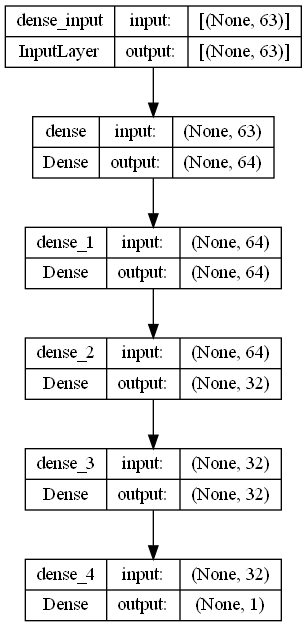

In [12]:
keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="loss", patience=5, restore_best_weights=True)
backup_and_restore_cb = tf.keras.callbacks.BackupAndRestore(backup_dir="./pickles/backup")
tensorboard_cb = keras.callbacks.TensorBoard("./TensorBoardLogs")

In [15]:
X_train_arr = np.asarray(X_train).astype('float32')

In [16]:
y_train_arr = np.asarray(y_train).astype('float32')

In [32]:
history_path = "./pickles/sequential-history.joblib"

In [17]:
if exists:
    print("Already fitted")
    history = joblib.load(history_path)
else:
    history = model.fit(
        X_train_arr, y_train_arr,
        epochs=60,
        batch_size=20,
        #validation_data=(X_val, y_val),
        callbacks=[
            early_stopping_cb,
            backup_and_restore_cb,
            tensorboard_cb,
        ])
    history = history.history

Epoch 1/60
10485/10485 [==============================] - 9s 818us/step - loss: 548.7249
Epoch 2/60
10485/10485 [==============================] - 8s 760us/step - loss: 485.1802
Epoch 3/60
10485/10485 [==============================] - 8s 752us/step - loss: 429.0359
Epoch 4/60
10485/10485 [==============================] - 8s 764us/step - loss: 401.9027
Epoch 5/60
10485/10485 [==============================] - 8s 779us/step - loss: 387.3674
Epoch 6/60
10485/10485 [==============================] - 8s 726us/step - loss: 378.7080
Epoch 7/60
10485/10485 [==============================] - 8s 759us/step - loss: 373.0976
Epoch 8/60
10485/10485 [==============================] - 8s 755us/step - loss: 368.8094
Epoch 9/60
10485/10485 [==============================] - 8s 744us/step - loss: 365.4346
Epoch 10/60
10485/10485 [==============================] - 8s 735us/step - loss: 362.4702
Epoch 11/60
10485/10485 [==============================] - 8s 756us/step - loss: 360.0874
Epoch 12/60
10485/1

In [33]:
joblib.dump(history.history, history_path)

['./pickles/sequential-history.joblib']

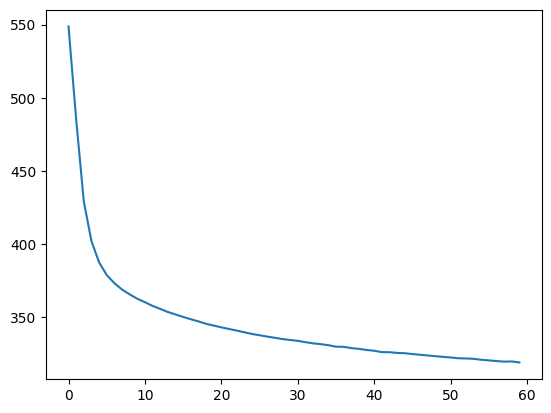

In [35]:
plt.plot(history["loss"])

In [36]:
model.save(model_path)

In [38]:
pred = model.predict(X_test)
pred

2185/2185 [==============================] - 1s 428us/step


array([[162.37395],
       [ 81.48377],
       [529.3301 ],
       ...,
       [194.08566],
       [ 99.75981],
       [905.30664]], dtype=float32)

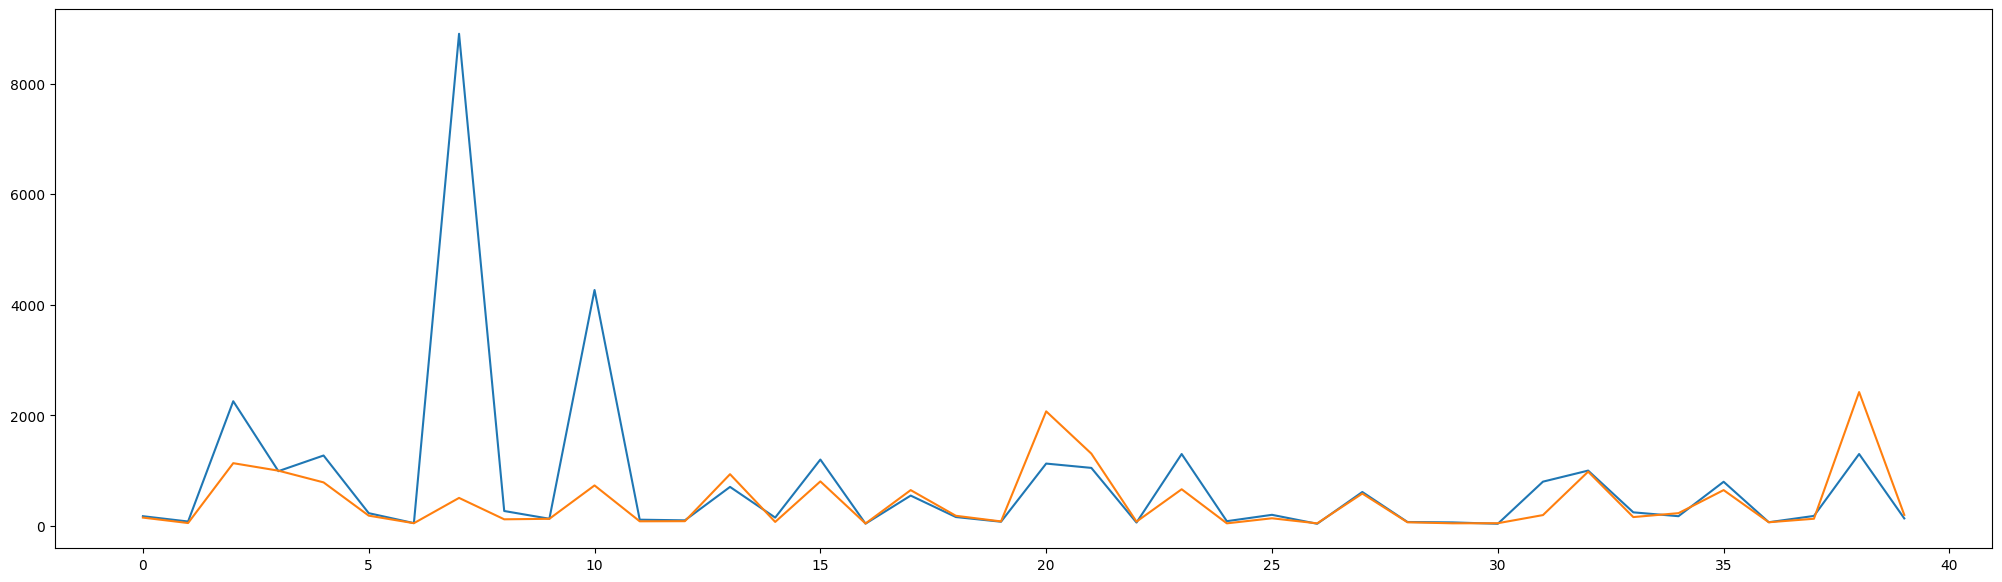

In [39]:
rng = slice(340, 380)

plt.figure(figsize=(25, 7))
plt.plot(y_test[rng].values)
plt.plot(pred[rng])

In [70]:
results = atomic_benchmark_estimator(model, X_test[:5000], verbose=True, kwargs_estimator_predict=dict(verbose=0))

atomic_benchmark runtimes: 0.024998903274536133 0.028478145599365234 0.1793370246887207


<Axes: >

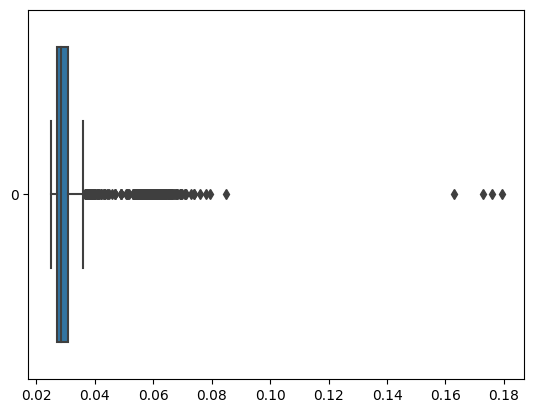

In [71]:
sns.boxplot(results, orient="h")

In [72]:
score = r2_score(y_test, pred)
score

0.08181196211098984

In [73]:
mae = mean_absolute_error(y_test, pred)
mae

328.4954358352203

In [75]:
model.evaluate(np.asarray(X_test).astype('float32'), np.asarray(y_test).astype('float32'))

2185/2185 [==============================] - 1s 472us/step - loss: 328.4954


328.49542236328125

In [94]:
store_model_performance(
    model_name="sequential",
    R2_score=score,
    mae=mae,
    avarage_predication_time=results.mean(),
    parameters={
        "layers": [(l.__class__.__name__, l.units, l.activation.__name__) for l in model.layers]
    },
)